# Building feed forward networks
This notebook explains how to build feed forward neural networks with Tensorflow 2.
In this notebook we'll be using the MNIST dataset to explain how to recognize hand-written digits using deep learning.

## Libraries used in this notebook
We're using a couple of libraries in this notebook:

* Numpy - A numeric processing library in Python
* Tensorflow - A deep learning framework
* Matplotlib - A plotting library in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical

np.random.seed(1337)
tf.random.set_seed(1337)

## Dataset used in this notebook
In this notebook we're going to take a look at classifying which digit a person wrote on paper.
For this we're going to use a well-known dataset, MNIST. The MNIST dataset contains:

* 60.000 training samples
* 10.000 testing samples

Let's load the dataset and take a look at what we're dealing with here:

In [2]:
(x_train, y_train),  (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Number:  5


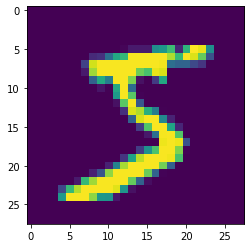

In [3]:
plt.imshow(x_train[0])
print("Number: ", y_train[0])

Number:  0


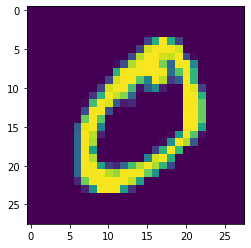

In [4]:
plt.imshow(x_train[1])
print("Number: ", y_train[1])

## Building the neural network
In order for the computer to learn what digit was written, we need to build a neural network that:

* Takes an image as input
* A set of categories (0-9) to predict which digit was written.

The neural network will have:

* An input layer that fits the pixels in the image (28*28)
* An output layer that fits the digits that we want to predict (10 in total)
* A hidden layer to account for the data complexity.

In [5]:
model = Sequential()

model.add(Dense(28*28, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(28*28, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


## Preparing the dataset to match the neural network
Regular feed-forward networks can't work with 2D images. We need to change the shape of the input data so it is a long sequence of pixels rather than a 2D matrix. In order to do this, we need to use the `reshape(...)` method on the input data.

In [7]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

The output data is represented as a digit (0-9). Our model doesn't understand this, it needs a format that looks like the sample below:

In [8]:
print("Original number: ", y_train[0])
print("One-hot representation: ", to_categorical(y_train[0], 10))

Original number:  5
One-hot representation:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


We're going to have to use the `to_categorical` method to make the output data fit the network.

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Training the neural network
Now that we have the data in the correct representation, we can train the neural network.
This is done by calling the `fit` method on the model.

In [10]:
batch_size = 128
epochs = 10

In [11]:
output = model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 1.4454 - accuracy: 0.7068 - val_loss: 0.8616 - val_accuracy: 0.8421
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6796 - accuracy: 0.8604 - val_loss: 0.5291 - val_accuracy: 0.8866
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4772 - accuracy: 0.8886 - val_loss: 0.4145 - val_accuracy: 0.8985
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3897 - accuracy: 0.9030 - val_loss: 0.3545 - val_accuracy: 0.9090
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3393 - accuracy: 0.9117 - val_loss: 0.3182 - val_accuracy: 0.9147
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3048 - accuracy: 0.9187 - val_loss: 0.2932 - val_accuracy: 0.9199
Epoch 7/10
60000/60000 [==============================] 

## Output metrics
There's a few interesting metrics that we collect during training

* Training/Validation loss: The output of the loss function, we want this to go down.
* Training/Validation accuracy: The accuracy of the model, we want this to go up.

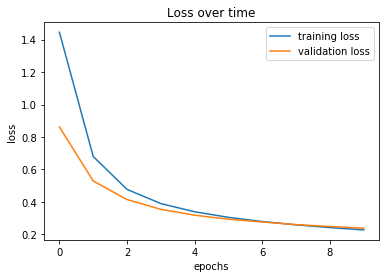

In [12]:
# Plot both loss functions
plt.plot(output.history['loss'], label='training loss')
plt.plot(output.history['val_loss'], label='validation loss')

# Format the plot, so we know what we're on about.
plt.title("Loss over time")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

plt.show()

In [13]:
max_accuracy = np.max(output.history['val_accuracy'])
max_accuracy_epoch = output.history['val_accuracy'].index(max_accuracy)

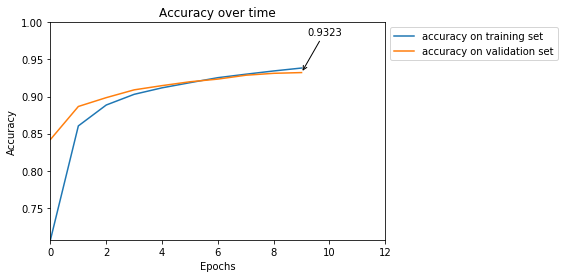

In [14]:
# Set some limits for a prettier picture
plt.xlim(0, 12)
plt.ylim(np.min(output.history['accuracy']), 1.0)

# Plot the data
plt.plot(output.history['accuracy'], label='accuracy on training set')
plt.plot(output.history['val_accuracy'], label='accuracy on validation set')

# Properly format the chart, so you know what you're looking at.
plt.title('Accuracy over time')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Highlight the max accuracy on the validation set.
plt.annotate(
    max_accuracy, 
    xy=(max_accuracy_epoch, max_accuracy), 
    xytext=(max_accuracy_epoch + 0.2, max_accuracy + 0.05), 
    arrowprops={'arrowstyle': '->', })


plt.show()